In [51]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
from matplotlib import pyplot as plt 
sns.set()
from collections import Counter
%matplotlib inline

In [52]:
df_playoff = pd.DataFrame.from_csv('Data/Cleaned_Data/playoff_clean.csv')
df_playoff = df_playoff.reset_index().set_index(['Spieler','Team'])

df_playoff_grouped = df_playoff.groupby(level=[0]).agg({"GP": "sum",
                                      "G": "sum",
                                      "A": "sum",
                                      "SOG": "sum",
                                      "PTS": "sum",
                                      "PIM Total": "sum",
                                      "Number of year": "sum"})
df_playoff_grouped["PO_PTS"] = df_playoff_grouped["PTS"]/df_playoff_grouped["GP"]
df_playoff_grouped["PO_G"] = df_playoff_grouped["G"]/df_playoff_grouped["GP"]
df_playoff_grouped["PO_A"] = df_playoff_grouped["A"]/df_playoff_grouped["GP"]
df_playoff_grouped["PO_SOG"] = df_playoff_grouped["SOG"]/df_playoff_grouped["GP"]
df_playoff_grouped["PO_PIM"] = df_playoff_grouped["PIM Total"]/df_playoff_grouped["GP"]
df_playoff_grouped["PO_PTS"] = df_playoff_grouped["PTS"]/df_playoff_grouped["GP"]
df_playoff_grouped["PO_GP"] = df_playoff_grouped["GP"]
df_playoff_grouped["PO_NoY"] = df_playoff_grouped["Number of year"]
df_playoff_grouped.drop(['PTS','G','A','SOG','PIM Total','GP','Number of year'], axis=1, inplace=True)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfc in position 3: invalid start byte

In [53]:
df_regular = pd.DataFrame.from_csv('Data/Cleaned_Data/regular_season_clean.csv')
df_regular = df_regular.reset_index().set_index(['Spieler', 'Team'])
df_regular

df_regular_grouped = df_regular.groupby(level=[0]).agg({"GP": "sum",
                                      "G": "sum",
                                      "A": "sum",
                                      "SOG": "sum",
                                      "PTS": "sum",
                                      "PIM Total": "sum",
                                      "Number of year": "sum",
                                      "Pos": "first"})
df_regular_grouped["RE_PTS"] = df_regular_grouped["PTS"]/df_regular_grouped["GP"]
df_regular_grouped["RE_G"] = df_regular_grouped["G"]/df_regular_grouped["GP"]
df_regular_grouped["RE_A"] = df_regular_grouped["A"]/df_regular_grouped["GP"]
df_regular_grouped["RE_SOG"] = df_regular_grouped["SOG"]/df_regular_grouped["GP"]
df_regular_grouped["RE_PIM"] = df_regular_grouped["PIM Total"]/df_regular_grouped["GP"]
df_regular_grouped["RE_PTS"] = df_regular_grouped["PTS"]/df_regular_grouped["GP"]
df_regular_grouped["RE_GP"] = df_regular_grouped["GP"]
df_regular_grouped["RE_NoY"] = df_regular_grouped["Number of year"]
df_regular_grouped.drop(['PTS','G','A','SOG','PIM Total','GP','Number of year'], axis=1, inplace=True)

In [54]:
common_grouped = df_regular_grouped[(df_regular_grouped.index.isin(df_playoff_grouped.index))]
common_concat = pd.concat([common_grouped,df_playoff_grouped], axis=1)
common_concat.dropna(inplace=True)
common_concat

,Pos,RE_PTS,RE_G,RE_A,RE_SOG,RE_PIM,RE_GP,RE_NoY,PO_PTS,PO_G,PO_A,PO_SOG,PO_PIM,PO_GP,PO_NoY
Abid Ramzi,Forward,0.939394,0.272727,0.666667,2.363636,2.636364,33.0,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,1,1
Abplanalp Marc,Defender,0.142442,0.040698,0.101744,0.656977,0.421512,344.0,8.0,0.224138,0.068966,0.155172,0.931034,0.275862,58,7
Abplanalp Sandro,Forward,0.125000,0.083333,0.041667,0.708333,0.083333,24.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,4,1
Aeschlimann Marc,Forward,0.277778,0.111111,0.166667,1.083333,0.000000,72.0,3.0,0.181818,0.000000,0.181818,0.818182,0.181818,11,2
Afanasenkov Dmitry,Forward,0.571429,0.214286,0.357143,2.642857,0.428571,14.0,1.0,0.333333,0.333333,0.000000,2.666667,0.000000,3,1
Akerman Johan,Defender,0.583333,0.083333,0.500000,1.944444,1.861111,36.0,1.0,0.000000,0.000000,0.000000,1.333333,0.666667,3,1
Alatalo Santeri,Defender,0.225275,0.038462,0.186813,1.340659,0.785714,182.0,4.0,0.076923,0.000000,0.076923,1.076923,1.076923,13,3
Almond Cody,Forward,0.710280,0.289720,0.420561,2.140187,1.467290,107.0,4.0,0.516129,0.096774,0.419355,1.935484,1.290323,31,3
Alston Jan,Forward,0.797980,0.353535,0.444444,2.383838,0.949495,99.0,2.0,0.545455,0.181818,0.363636,2.000000,1.272727,11,2
Altorfer Niki,Forward,0.125000,0.000000,0.125000,1.125000,0.000000,8.0,2.0,0.000000,0.000000,0.000000,0.200000,0.400000,5,2


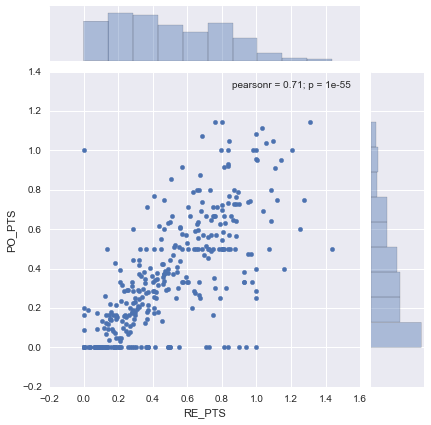

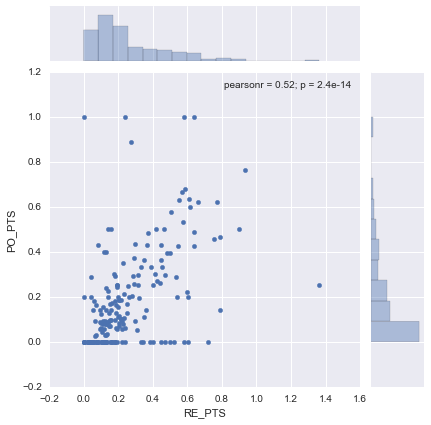

In [65]:
df_def = common_concat[common_concat["Pos"] == "Defender"]
df_for = common_concat[common_concat["Pos"] == "Forward"]

sns.jointplot(x=df_for["RE_PTS"], y=df_for["PO_PTS"])
sns.jointplot(x=df_def["RE_PTS"], y=df_def["PO_PTS"])

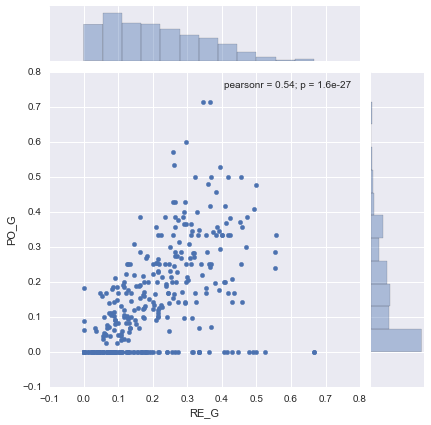

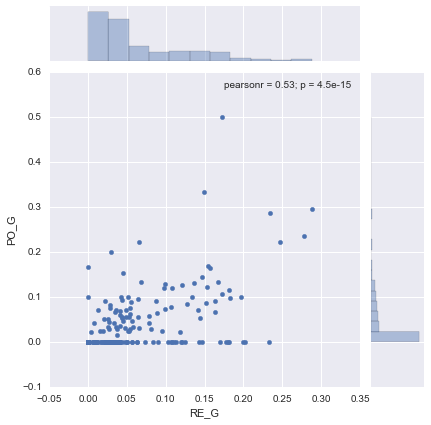

In [49]:
sns.jointplot(x=df_for["RE_G"], y=df_for["PO_G"])
sns.jointplot(x=df_def["RE_G"], y=df_def["PO_G"])

In [5]:
sns.regplot()

TypeError: regplot() missing 2 required positional arguments: 'x' and 'y'